In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#### 1. О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

Дисперсия равномерного распределения
$$D(X) = \dfrac{(b - a)^2}{12}.$$
D(X) = 0.2 <br>
a = 0.5 <br>
Найти b можно, решим данное уравнение, с учетом того что b > a (поскольку нужно найти правую границу)

In [56]:
D = 0.2
a = 0.5
b = 1/2 + 2*(3/5)**(1/2) # приводить решение квадратного уравнения, думаю, не обязательно
b

2.049193338482967

In [69]:
# сверим результат с функцией numpy (для больше точности можно увеличивать size ближе к бесконечности)

In [70]:
samples = np.random.uniform(a, b, size=1000000)
samples.var()

0.20005199158880188

In [71]:
# теперь, зная границы a и b, можно посчитать M(X) и сверить с np.mean()

In [72]:
M = (a+b) / 2
M

1.2745966692414834

In [73]:
samples.mean()

1.274773215394823

#### 2. Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

In [332]:
loc = 1.06

In [367]:
stats.norm.cdf(x=1, loc=loc, scale=.036478)

0.050002744285571166

In [368]:
scale = .036478

In [378]:
values = np.random.normal(loc, scale, size=1000000)

In [379]:
values

array([1.0488715 , 1.11463915, 0.98955649, ..., 1.03633687, 1.06763768,
       1.08502819])

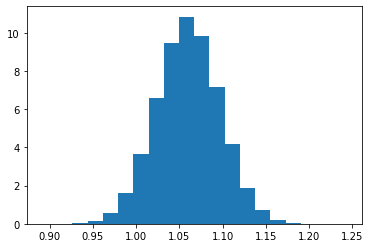

In [380]:
plt.hist(values, density=True, bins=20)
plt.show()

In [381]:
len([i for i in values if i < 1]) / len(values)

0.050039

In [382]:
len([i for i in values if i > 1.1]) / len(values)

0.136456

#### 3. Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

In [224]:
a = 12 # наименьший вес
b = 14 # наибольший вес

m = (a + b) / 2
d = ((b - a) ** 2) / 12
n = 30 # число конфет в коробке
n_samples = 100000 # кол-во выборок

In [225]:
def get_weights(n: int) -> np.ndarray:
    """Возвращает выборку массы коробок.
    """    
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.sum(axis=0)

In [226]:
samples = get_weights(n)
#samples

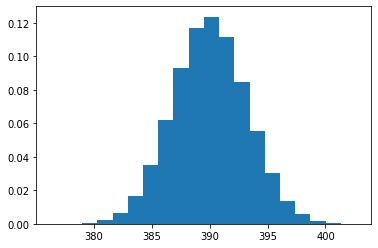

In [227]:
loc = m

plt.hist(samples, density=True, bins=20)
plt.show()

In [221]:
len([i for i in samples if i < 390]) / n_samples    

0.49764

In [219]:
len([i for i in samples if i > 395]) / n_samples

0.05763

In [220]:
len([i for i in samples if i > 380 and i < 400]) / n_samples

0.99867